Indentitas
Ignatius Joti Argapoda Panggabean/200710862

SQLAlchemy_KlasifikasiJamurEnokiKancingKuping_VGG-16

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt 

data_dir = r"train_data"

data = tf.keras.utils.image_dataset_from_directory(data_dir, seed = 123, image_size = (180, 180), batch_size = 16)
print(data.class_names)

class_names = data.class_names

img_size = 180
batch = 32
validation_split = 0.1
test_split = 0.1
dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    seed = 123,
    image_size = (img_size, img_size),
    batch_size = batch,
)
total_count = len(dataset)
test_count = int(total_count * test_split)
val_count = int(total_count * validation_split)
train_count = total_count - val_count - test_count

print("Total Images:", total_count)
print("Train Images:", train_count)
print("Validation Images:", val_count)
print("Test Images:", test_count)

train_ds = dataset.take(train_count)
temp_ds = dataset.skip(train_count)
val_ds = temp_ds.take(val_count)
test_ds = temp_ds.skip(val_count)

Found 300 files belonging to 3 classes.
['JamurEnoki', 'JamurKancing', 'JamurKuping']
Found 300 files belonging to 3 classes.
Total Images: 10
Train Images: 8
Validation Images: 1
Test Images: 1


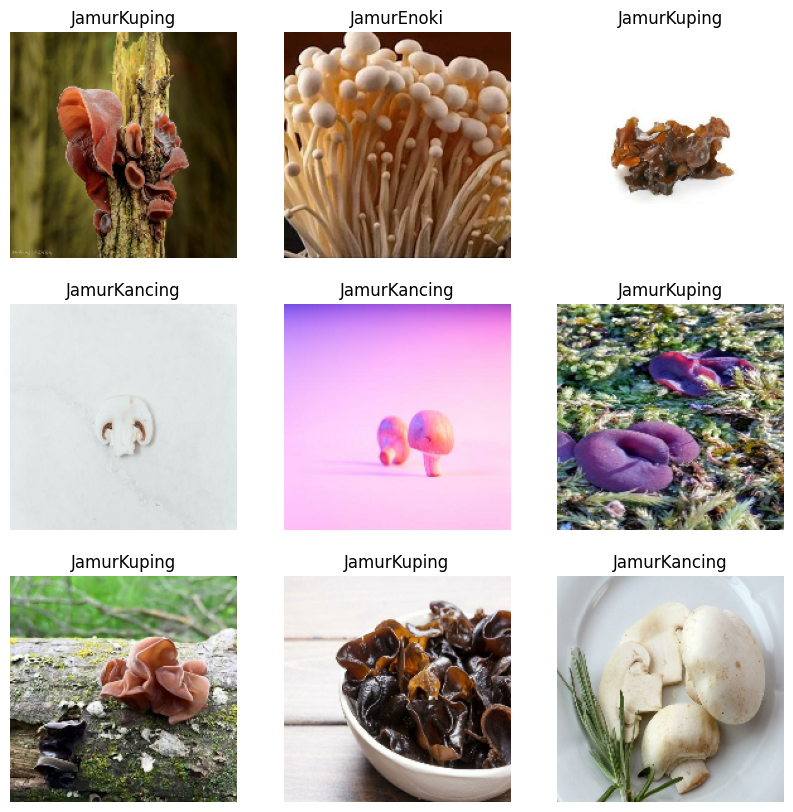

In [2]:
import matplotlib.pyplot as plt

i = 0
plt.figure(figsize=(10,10))


for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

In [3]:
for images, labels in train_ds.take(1):
    images_array = np.array(images)
    print(images_array.shape)

(32, 180, 180, 3)


In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import backend as K

def vgg16(input_shape, n_classes):
    model = Sequential()

    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(n_classes, activation='softmax')) 

    return model

input_shape = (180, 180, 3)
n_classes = 3

K.clear_session()

model = vgg16(input_shape, n_classes)

model.summary()


c:\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 180, 180, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 180, 180, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 90, 90, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 90, 90, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 45, 45, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 123904)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    63,439,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,586,307 (246.38 MB)

 Trainable params: 64,586,307 (246.38 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=1e-4), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

early_stopping = EarlyStopping(
    monitor='val_accuracy', 
    patience=5, 
    mode='max'
)

history = model.fit(
    train_ds, 
    epochs=30, 
    validation_data=val_ds, 
    callbacks=[early_stopping]
)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 128s 14s/step - accuracy: 0.3453 - loss: 58.7735 - val_accuracy: 0.3750 - val_loss: 9.8230
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 105s 13s/step - accuracy: 0.3667 - loss: 6.8227 - val_accuracy: 0.2500 - val_loss: 1.6225
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 141s 13s/step - accuracy: 0.5203 - loss: 1.0780 - val_accuracy: 0.5625 - val_loss: 0.8277
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 104s 13s/step - accuracy: 0.5663 - loss: 0.8218 - val_accuracy: 0.5625 - val_loss: 0.7485
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 145s 13s/step - accuracy: 0.7109 - loss: 0.6565 - val_accuracy: 0.7812 - val_loss: 0.4552
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 101s 13s/step - accuracy: 0.8080 - loss: 0.5166 - val_accuracy: 0.9062 - val_loss: 0.3929
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 101s 13s/step - accuracy: 0.8554 - loss: 0.3828 - val_accuracy: 0.9688 - val_loss: 0.1909
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 102s 13s/step - accuracy: 0.9320 - loss: 0.2421 - val_accuracy: 0.9062 - val_loss

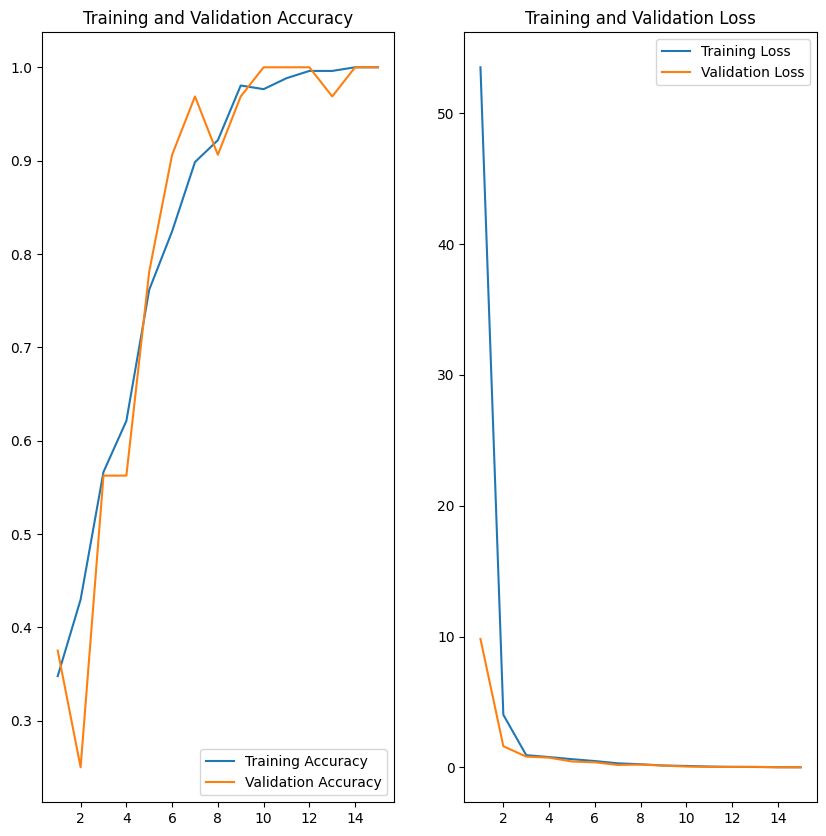

In [8]:
epochs_range = range(1, len(history.history['loss']) + 1)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [9]:
model.save('BestModel_VGG-16_SQLAlchemy.h5')

In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from PIL import Image

model = load_model(r'BestModel_VGG-16_SQLAlchemy.h5')
class_names = ['JamurEnoki', 'JamurKancing', 'JamurKuping']

def classify_images(image_path, save_path='predicted_image.jpg'):
    try:
        input_image = tf.keras.utils.load_img(image_path, target_size=(180, 180))
        input_image_array = tf.keras.utils.img_to_array(input_image)
        input_image_exp_dim = tf.expand_dims(input_image_array, 0)

        predictions = model.predict(input_image_exp_dim)
        result = tf.nn.softmax(predictions[0])
        class_idx = np.argmax(result)
        confidence = np.max(result) * 100

        print(f"Prediksi: {class_names[class_idx]}")
        print(f"Confidence: {confidence:.2f}%")

        input_image = Image.open(image_path)
        input_image.save(save_path)

        return f"Prediksi: {class_names[class_idx]} dengan confidence {confidence:.2f}%. Gambar asli disimpan di {save_path}."
    except Exception as e:
        return f"Terjadi kesalahan: {e}"

result = classify_images(r"test_data\JamurKancing\JamurKancingTest_07.jpg")
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 688ms/step
Prediksi: JamurKancing
Confidence: 57.55%
Prediksi: JamurKancing dengan confidence 57.55%. Gambar asli disimpan di predicted_image.jpg.


Found 30 files belonging to 3 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


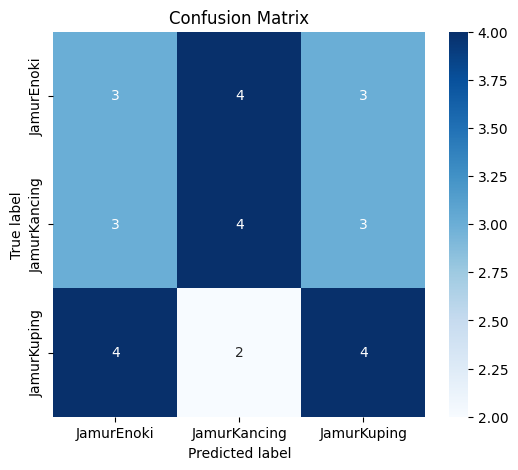

Confusion Matrix:
 [[3 4 3]
 [3 4 3]
 [4 2 4]]
Akurasi: 0.36666666666666664
Presisi: [0.3 0.4 0.4]
Recall: [0.3 0.4 0.4]
F1 Score: [0.3 0.4 0.4]


In [12]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import seaborn as sns
import matplotlib.pyplot as plt


test_data = tf.keras.preprocessing.image_dataset_from_directory(
    r'test_data',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(180, 180)
)

# Prediksi model
y_pred = model.predict(test_data)
y_pred_class = tf.argmax(y_pred, axis=1)

true_labels = []
for _, labels in test_data:
    true_labels.extend(tf.argmax(labels, axis=1).numpy())
true_labels = tf.convert_to_tensor(true_labels)

conf_mat = tf.math.confusion_matrix(true_labels, y_pred_class, num_classes=3)

accuracy = tf.reduce_sum(tf.linalg.diag_part(conf_mat)) / tf.reduce_sum(conf_mat)

precision = tf.linalg.diag_part(conf_mat) / tf.reduce_sum(conf_mat, axis=0)
recall = tf.linalg.diag_part(conf_mat) / tf.reduce_sum(conf_mat, axis=1)

f1_score = 2 * (precision * recall) / (precision + recall)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat.numpy(), annot=True, fmt='d', cmap='Blues', 
            xticklabels=["JamurEnoki", "JamurKancing", "JamurKuping"], yticklabels=["JamurEnoki", "JamurKancing", "JamurKuping"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

print("Confusion Matrix:\n", conf_mat.numpy())
print("Akurasi:", accuracy.numpy())
print("Presisi:", precision.numpy())
print("Recall:", recall.numpy())
print("F1 Score:", f1_score.numpy())